# 지도학습의 이해



REFERENCE: https://sumniya.tistory.com/26

1. 분류 : 카테고리를 예측
2. 회귀 : 값을 예측

## 점수화 기능으로 모델 성능을 측정

1. 정확도(accuracy_score): 정확도는 정확히 예측된 테스트 세트의 데이터 포인트 수를 계산하고, 그 수를 테스트 세트 크기 중에서 얼마나 되는지 나타내는 값으로 반환된다. 예를 들어, 개와 고양이를 구분하 는 분류기라면, 정확도는 고양이 또는 개가 정확하게 포함된 것으로 분류된 그림의 비율을 의미한다<br>
<br>
2. 정확률(precision_score): 정확률은, 분류기가 고양이를 포함한다고 생각하는 모든 테스트 세트 중에서 실제로, 고양이가 들어있는 그림의 비율을 의미


In [1]:
import numpy as np

In [2]:
np.random.seed(42)

In [5]:
y_true=np.random.randint(0,2,size=5) # 0,2사이의 임의의 정수 5개를 선택하여 임의의 레이블을 형성해라
y_true

array([0, 0, 0, 0, 1])

In [6]:
y_pred=np.ones(5,dtype=np.int32)
y_pred

array([1, 1, 1, 1, 1])

In [7]:
np.sum(y_true==y_pred)/len(y_true)


0.2

In [8]:
from sklearn import metrics
metrics.accuracy_score(y_true,y_pred)

0.2

그러나 정확률과 재현율을 이해하기 위해서는 1종 오차 및 2종오차에 대한 전반적인 이해가 필요하다<br>
클래스 레이블이 1인 데이터 요소는 종종 참이라고 하며, 클래스 레입르이 0 -1 인 데이터는 종종 거짓이라고 한다<br>
특정, 데이터 요소를 분류하면 다음의 혼란스러운 행렬에 표시된것처럼 네가지 가능한 결과 중 하나를 가질 것 이다



통계 가설 테스트에서 위양성은 1종 오차로도 알려져있으며, 위음성은 2종 오차라고 한다


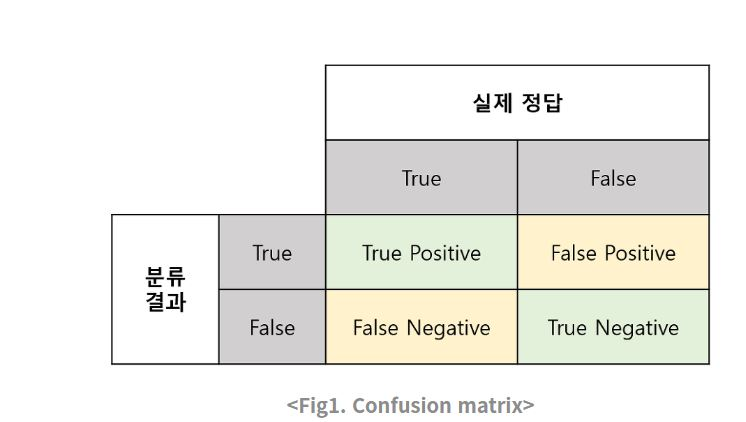

In [24]:
truly_a_positive=sum(y_true==1)
truly_a_positive

1

In [26]:
predicted_a_positve=sum(y_pred==1)
predicted_a_positve

5

In [27]:
false_posive=np.sum((y_pred==1)* (y_true==0))
false_posive

4

In [28]:
true_negative=np.sum((y_pred==0)*(y_true==0))
true_negative

0

# 1.accruncy
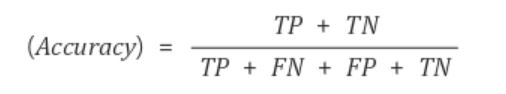


전체 데이터중에 정확하게 판별 된 데이터 비율


In [29]:
accruncy=(truly_a_positive+true_negative)/len(y_true)
accruncy

0.2

# 2. precision


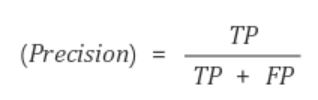


참으로 판별 된 것 중에 실제 참인 값

In [31]:
precision=truly_a_positive/(truly_a_positive+true_negative)
precision

1.0

In [32]:
metrics.precision_score(y_true,y_pred)

0.2

# 3. recall


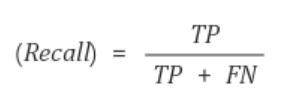

: 정확하게 판별된것 중에 실제 참인 값

In [35]:
recall=truly_a_positive/(truly_a_positive+false_negative)
recall

1.0

# precision - recall 은 trade off 관계

가설 검정 시에 어떤 상황에서 어떤 가설을 받아들일지의 기준이 필요합니다. 그래서, 그 기준으로써 critical region을 잡게 되는데 Type 1 error는 H0가 true일 때, reject H0일 확률, 즉, 미리 설정해둔 critical region의 표본을 뽑을 확률입니다. 위의 그림에서 Any mean이 기준점이고 H0 관점에서 빨간색 영역이 기각역이라고 볼 수 있습니다. 그리고 이 기각역에 따라 Type 2 error도 정해집니다. 그림으로 보다시피 Any mean을 좌우로 조정하게되면 Type 1, 2 error의 크기가 변합니다. 하지만 둘다 커지거나 둘다 작아지는 경우가 없는 trade-off관계입니다.


다시 본론으로 돌아와서, Precision과 Recall은 TP를 분자로써 같이하고 분모에는 TP에 Type 1, 2 error에 해당하는 FN, FP를 더하여 계산합니다. 이때, FN, FP는 각각 Type 1, 2 error에 있으므로 Precision과 Recall 또한 trade-off 관계에 있다고 할 수 있습니다.

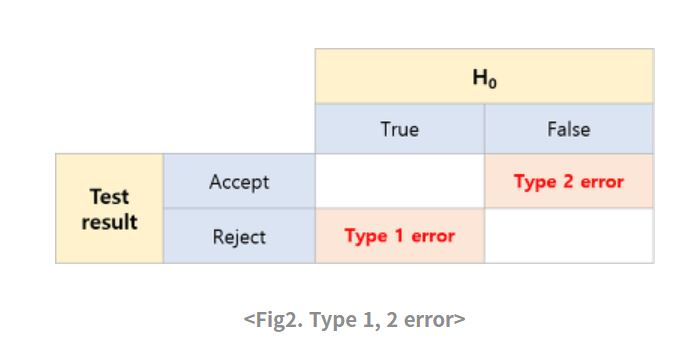

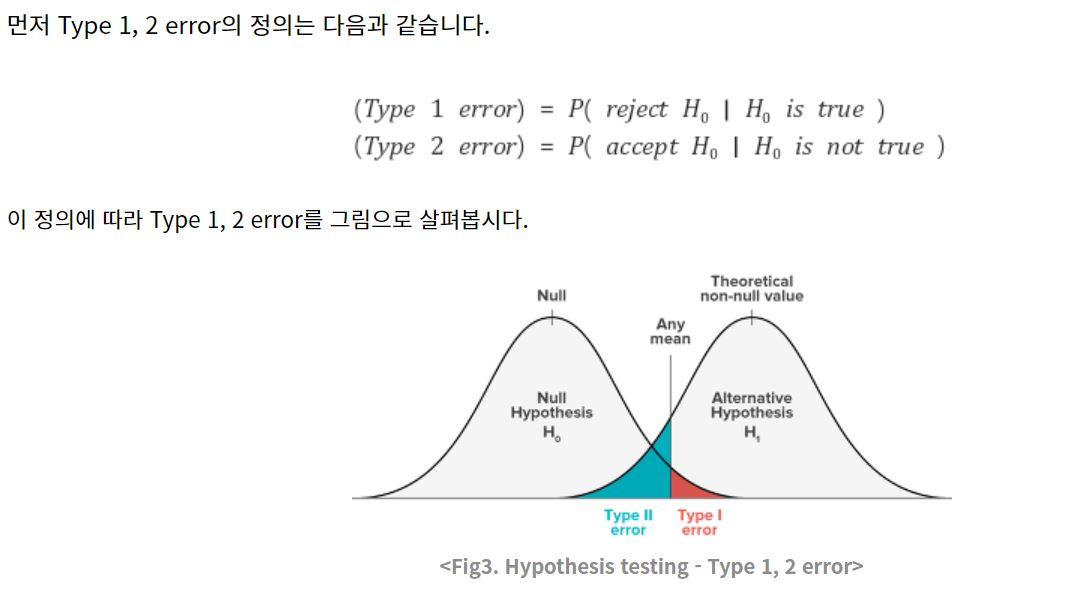

# f1-SCORE

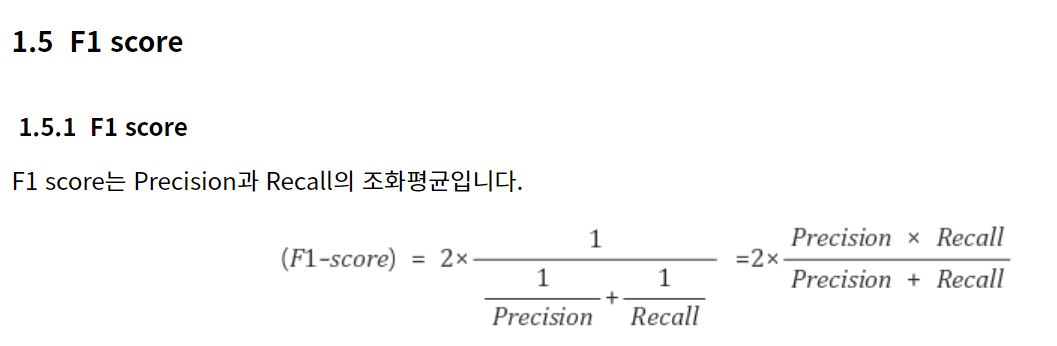

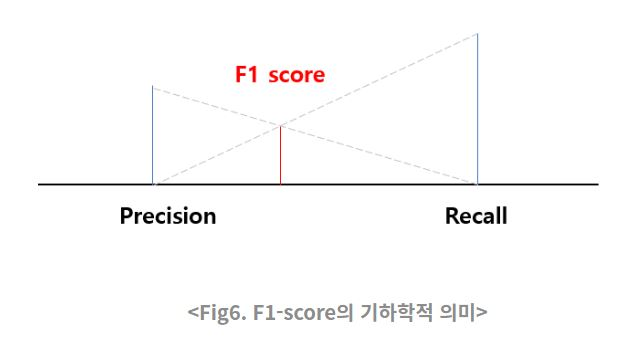